In [2]:
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import (
    LinearRegression, LogisticRegression,
    SGDClassifier, SGDRegressor,Ridge,
    RidgeClassifier, Lasso, ElasticNet,
)
from sklearn.naive_bayes import (
    GaussianNB, MultinomialNB, BernoulliNB,
    CategoricalNB, ComplementNB,
)

from sklearn.preprocessing import (
    StandardScaler, PolynomialFeatures, LabelEncoder,
)
from sklearn.pipeline import make_pipeline

from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    r2_score, mean_squared_error, mean_absolute_error,
    roc_curve, roc_auc_score, precision_recall_curve,
    auc,
)

from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate,
    KFold, StratifiedKFold, LeaveOneOut, LeavePOut,
    validation_curve,
)
from sklearn.datasets import (
    fetch_openml, make_classification, make_regression,
)

from mlxtend.plotting import plot_decision_regions
from yellowbrick.classifier import DiscriminationThreshold, ROCAUC
from yellowbrick.model_selection import LearningCurve

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: f'{x:.4f}')

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
import warnings; warnings.warn = lambda *k, **kw: ...

# <p align='center' style='color: #6c89c6;'>Работу выполнил: Таратин Артём ПМ22-1</p>

## Методичка

In [4]:
X, y = make_classification(
    n_samples=10000, n_features=500, n_informative=50,
    n_repeated=0, class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=3)

In [5]:
lr = LogisticRegression().fit(X_train, y_train)
print(f'Training score: {lr.score(X_train, y_train):.4f}')
print(f'Test score: {lr.score(X_test, y_test):.4f}')

Training score: 0.8413
Test score: 0.8056


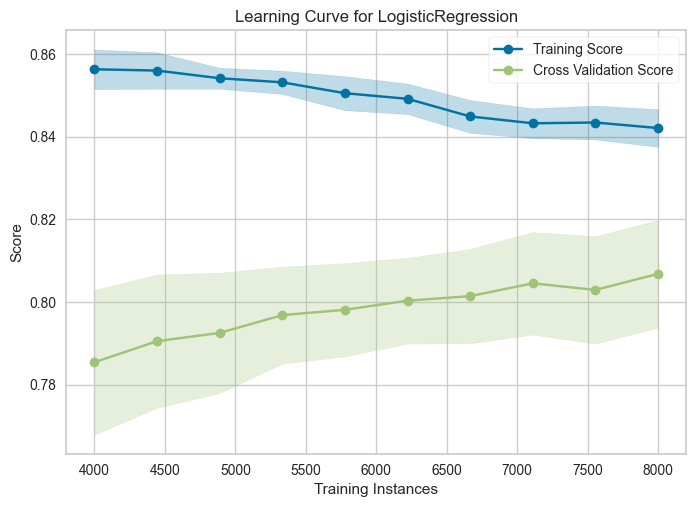

In [6]:
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

In [7]:
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)
print(f'Training score: {lr.score(X_train, y_train):.4f}')
print(f'Test score: {lr.score(X_test, y_test):.4f}')

Training score: 0.7724
Test score: 0.7712


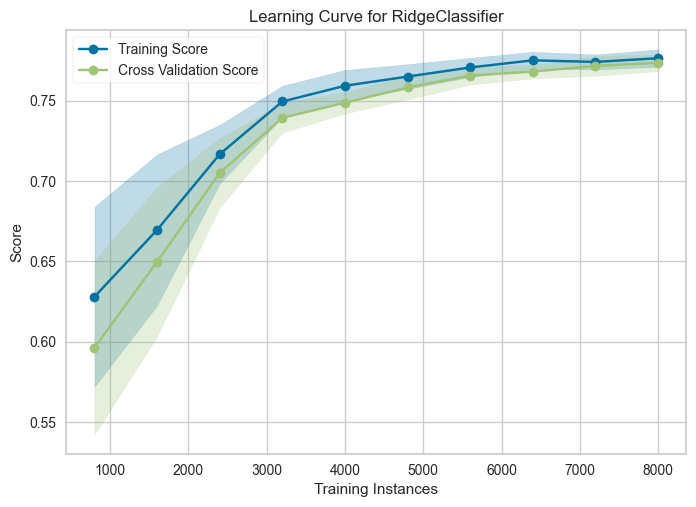

In [8]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

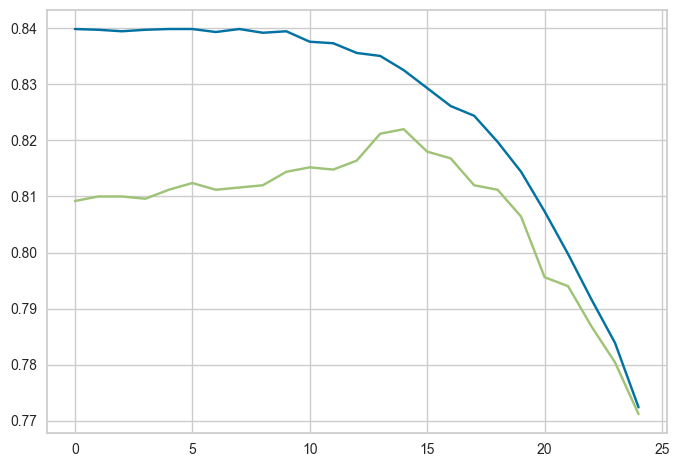

In [9]:
trains = []
tests = []
for i in np.logspace(2, 6, 25):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [10]:
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)
print(f'Training score: {lr.score(X_train, y_train):.4f}')
print(f'Test score: {lr.score(X_test, y_test):.4f}')

Training score: 0.8311
Test score: 0.8228


### Диагностика моделей регрессии

In [11]:
dataset = np.genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

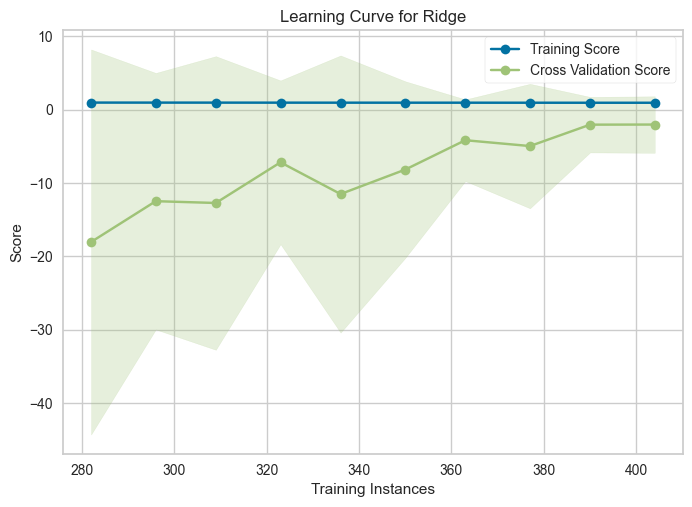

In [12]:
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y).show()

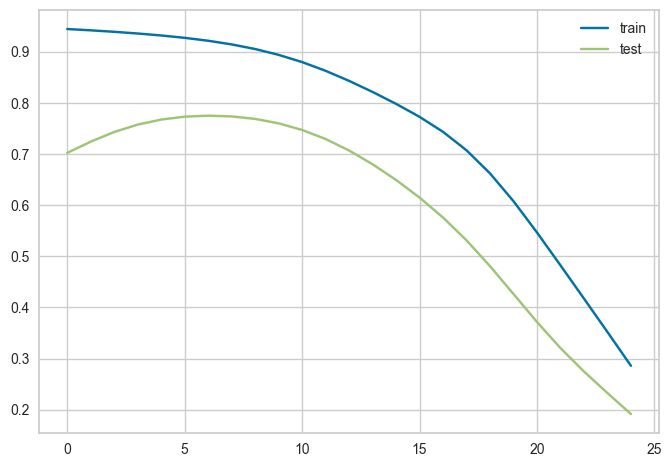

In [13]:
trains, tests = [], []
for i in np.logspace(-2, 3, 25):
  ridge = Ridge(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label='train')
plt.plot(tests, label='test')
plt.legend()
plt.show()

In [14]:
lr = Ridge(alpha=0.18).fit(X_train, y_train)
print(f'Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}')
print(f'Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}')

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


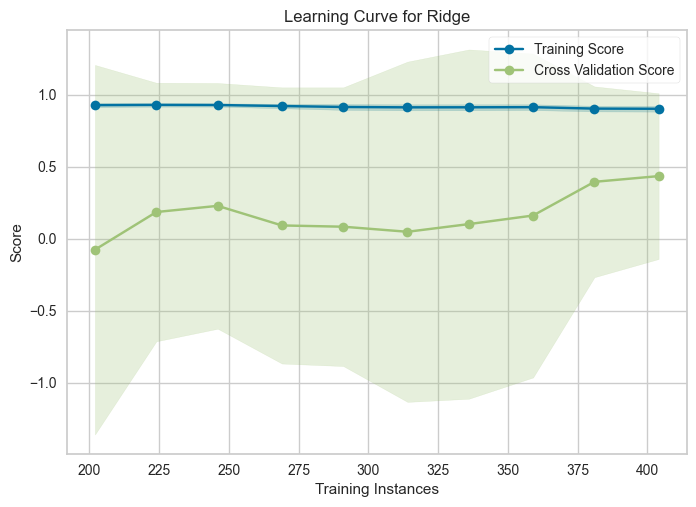

In [15]:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

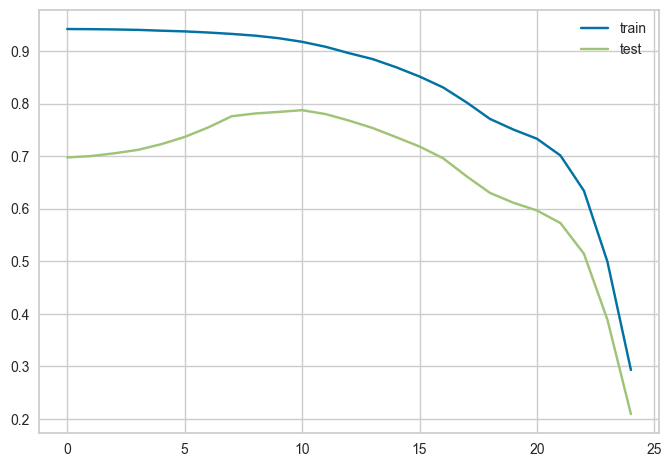

In [16]:
trains, tests = [], []
for i in np.logspace(-4, 0, 25):
  lasso = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(lasso.score(X_train, y_train))
  tests.append(lasso.score(X_test, y_test))

plt.plot(trains, label='train')
plt.plot(tests, label='test')
plt.legend()
plt.show()

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv', nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1


In [18]:
target = 'Outcome'
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Train score = %.4f' % accuracy_score(y_train, y_train_pred))
print('Test score = %.4f' % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


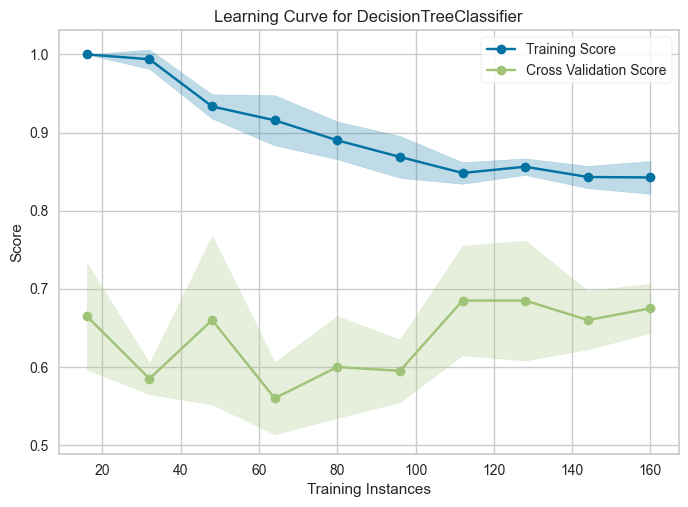

In [20]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = 'Outcome'
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Train score = %.4f' % accuracy_score(y_train, y_train_pred))
print('Test score = %.4f' % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


In [23]:
data = fetch_openml(name='delta_ailerons', parser='auto')
data.data.shape

(7129, 5)

In [24]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Train score = %.4f' % accuracy_score(y_train, y_train_pred))
print('Test score = %.4f' % accuracy_score(y_test, y_pred))

Train score = 0.6092
Test score = 0.5989


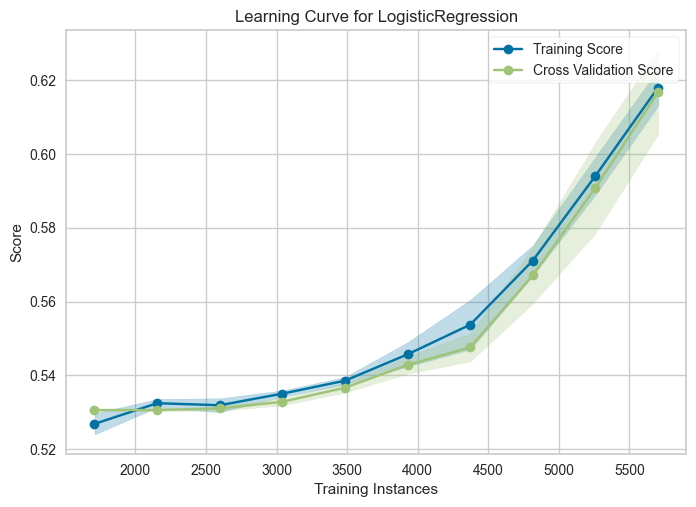

In [26]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y).show()

In [27]:
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Train score = %.4f' % accuracy_score(y_train, y_train_pred))
print('Test score = %.4f' % accuracy_score(y_test, y_pred))

Train score = 0.9390
Test score = 0.9390


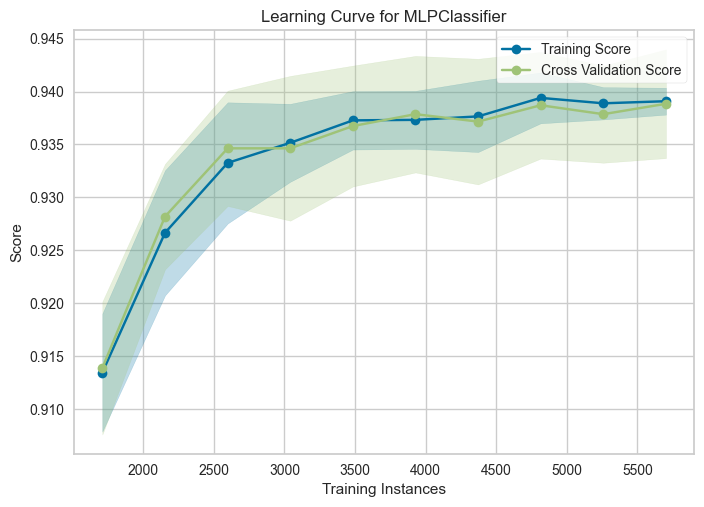

In [28]:
visualizer = LearningCurve(
    MLPClassifier(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y).show()

In [29]:
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print('Train score = %.4f' % accuracy_score(y_train, y_train_pred))
print('Test score = %.4f' % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


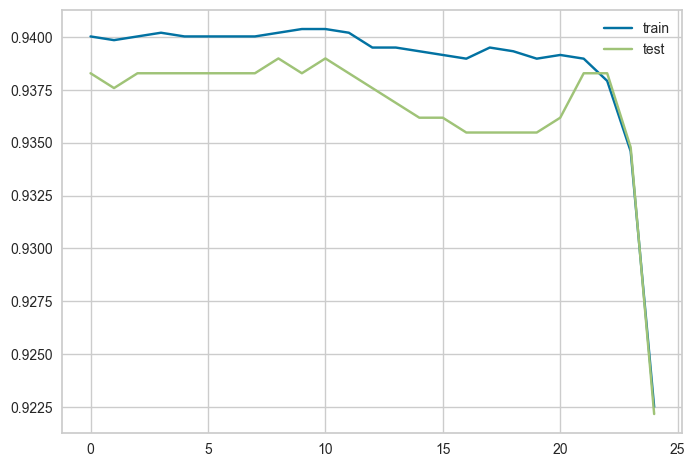

In [30]:
trains, tests = [], []
for i in np.logspace(-7, 0, 25):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label='train')
plt.plot(tests, label='test')
plt.legend()
plt.show()

## Задания для самостоятельного выполнения

#### 1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

In [31]:
X, y = make_classification(
    n_samples=10000, n_features=500, n_informative=50, n_repeated=0, class_sep=1,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
criterions = [accuracy_score, precision_score, recall_score, f1_score]
for criterion in criterions:
    lr = RidgeClassifier().fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    print(
        f'{criterion.__name__:<15}, ' +
        f'Training score: {criterion(y_pred_train, y_train):.4f}, ' +
        f'Test score: {criterion(y_pred_test, y_test):.4f}'
    )

accuracy_score , Training score: 0.8611, Test score: 0.8225
precision_score, Training score: 0.8592, Test score: 0.8238
recall_score   , Training score: 0.8620, Test score: 0.8196
f1_score       , Training score: 0.8606, Test score: 0.8217


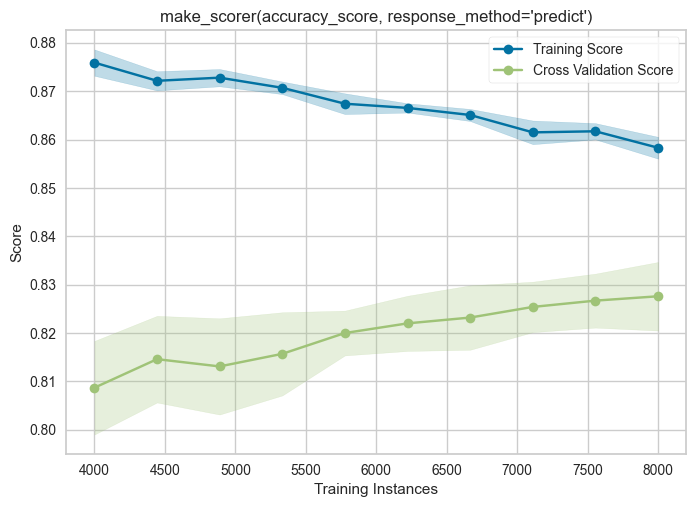

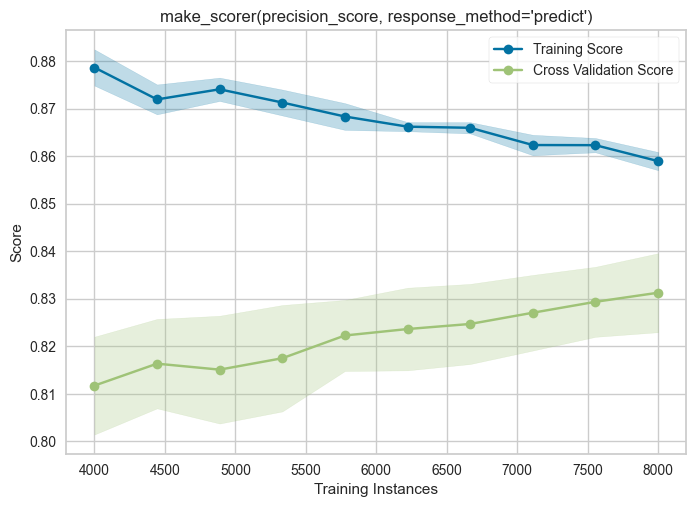

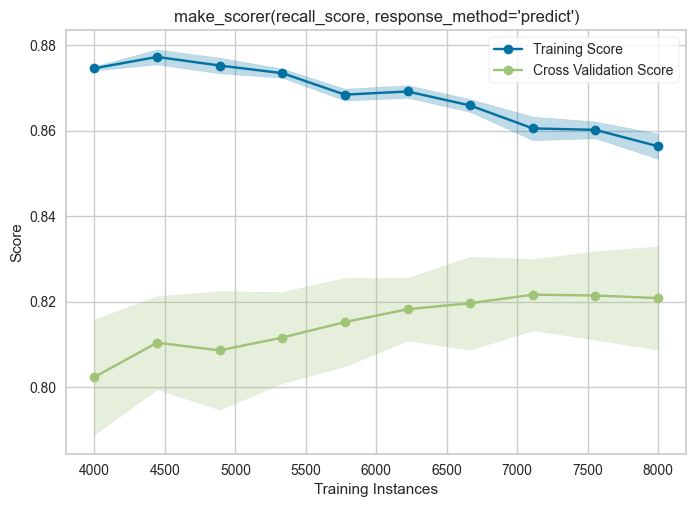

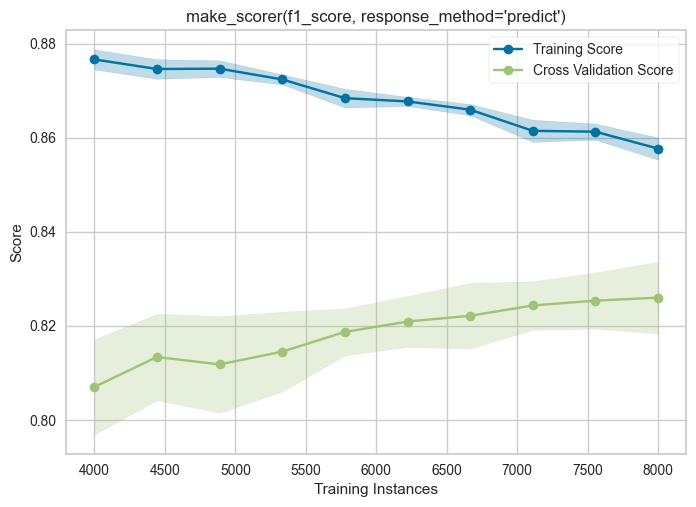

In [33]:
criterions_scorer = [make_scorer(i) for i in criterions]
for criterion in criterions_scorer:
    visualizer = LearningCurve(
        RidgeClassifier(),
        scoring=criterion,
        train_sizes=np.linspace(0.5, 1.0, 10),
        title=criterion
    ).fit(X, y).show()

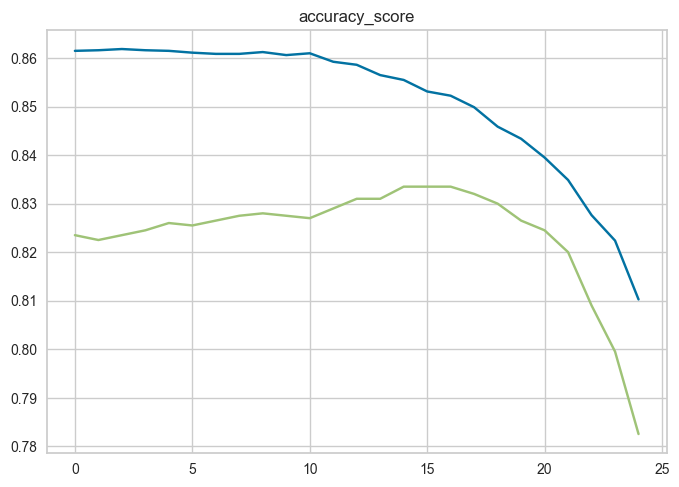

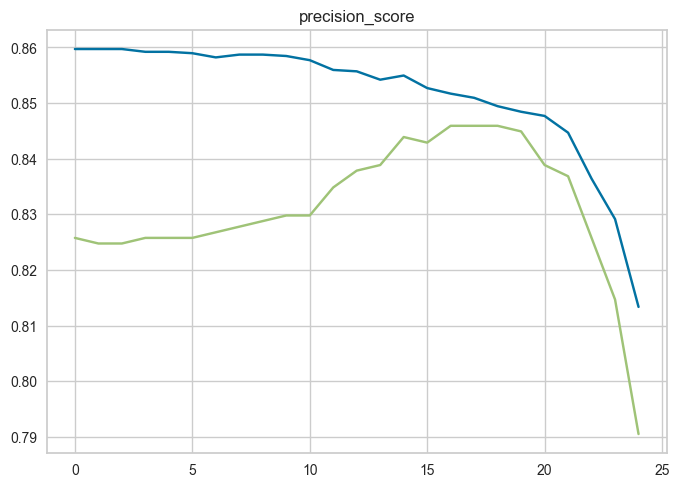

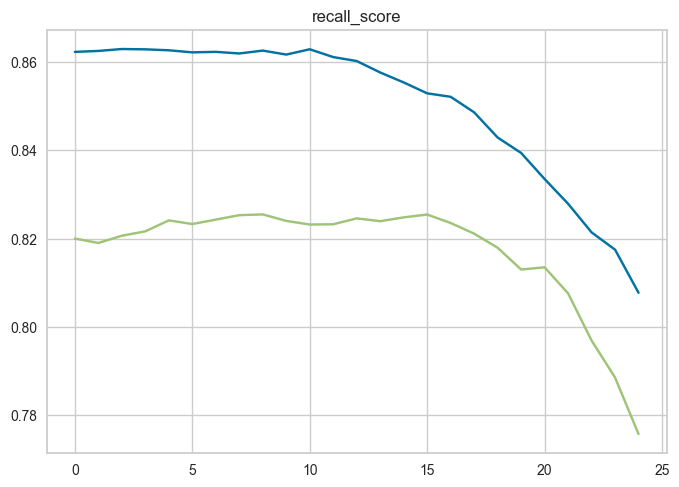

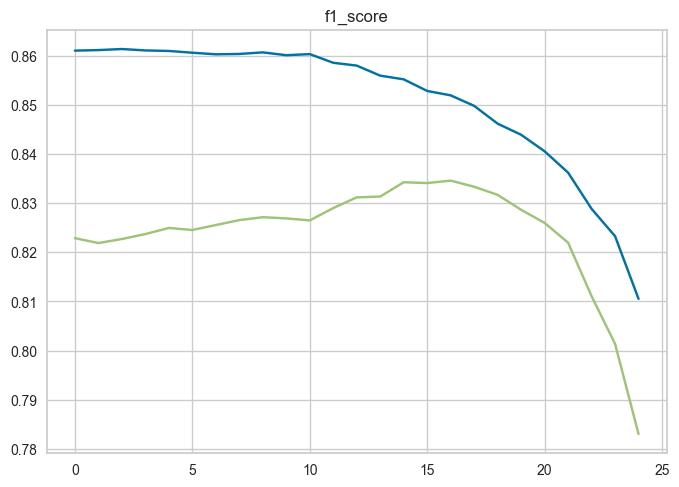

In [34]:
for criterion in criterions:
    trains, tests = [], []
    for i in np.logspace(2, 6, 25):
        ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
        y_pred_train = ridge.predict(X_train)
        y_pred_test = ridge.predict(X_test)
        trains.append(criterion(y_train, y_pred_train))
        tests.append(criterion(y_test, y_pred_test))

    plt.plot(trains)
    plt.plot(tests)
    plt.title(criterion.__name__)
    plt.show()

In [35]:
ridge = RidgeClassifier(alpha=np.logspace(2, 6, 25)[np.argmax(tests)]).fit(X_train, y_train)
print(f'Training score: {ridge.score(X_train, y_train):.4f}')
print(f'Test score: {ridge.score(X_test, y_test):.4f}')

Training score: 0.8522
Test score: 0.8335


#### 2. Повторите диагностику модели регрессии с использованием других видов моделей:
* метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)
* метода ближайших соседей (исследуйте влияние количества соседей)
* метода решающих деревьев (гиперпараметры по вашему выбору)

In [36]:
X, y = make_classification(
    n_samples=2000, n_features=100, n_informative=10, n_repeated=0, class_sep=1,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
def draw_criterions(model_class, param, criterions, vrange):
    for criterion in criterions:
        trains, tests = [], []
        for i in vrange:
            model = model_class(**{param: i}).fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            trains.append(criterion(y_train, y_pred_train))
            tests.append(criterion(y_test, y_pred_test))

        plt.plot(vrange, trains)
        plt.plot(vrange, tests)
        plt.title(criterion.__name__)
        plt.show()

In [38]:
criterions = [accuracy_score, f1_score]

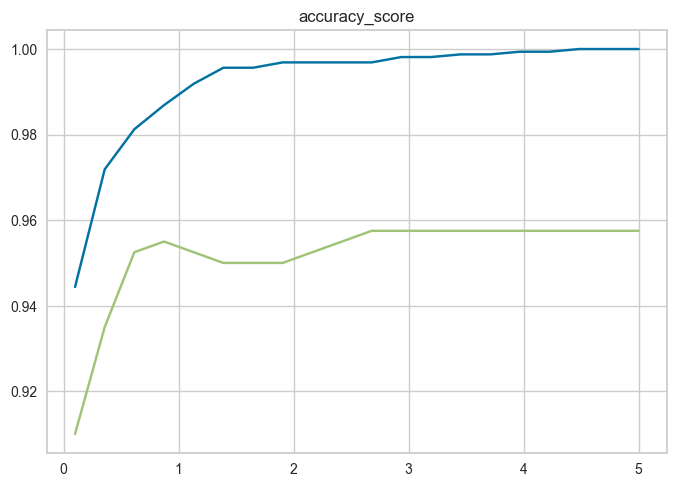

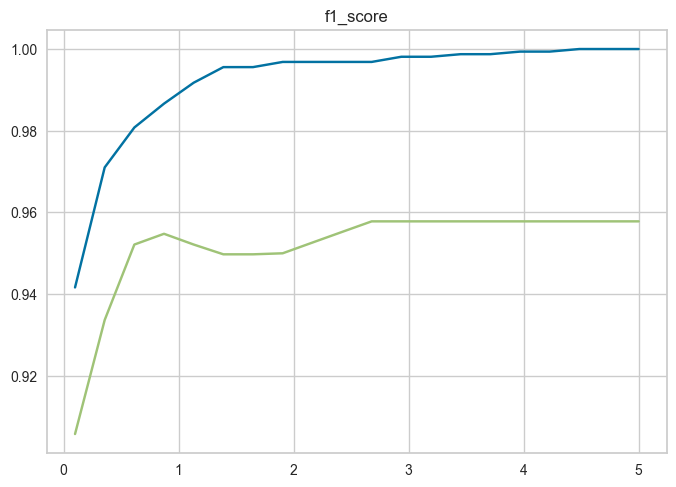

In [39]:
draw_criterions(
    SVC, 'C', criterions, np.linspace(1e-1, 5, 20)
)

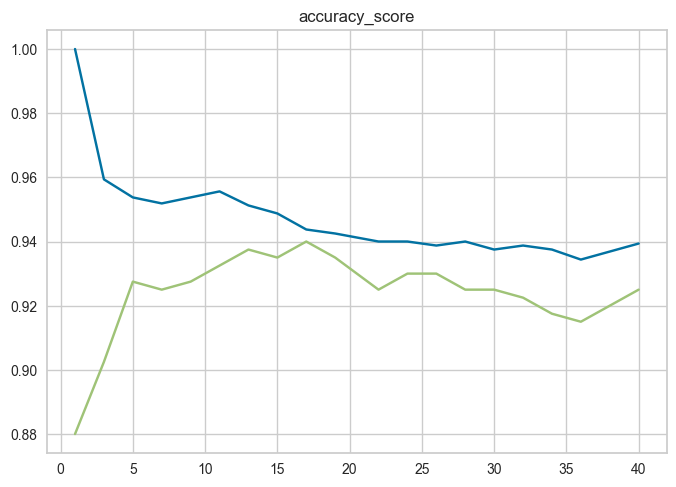

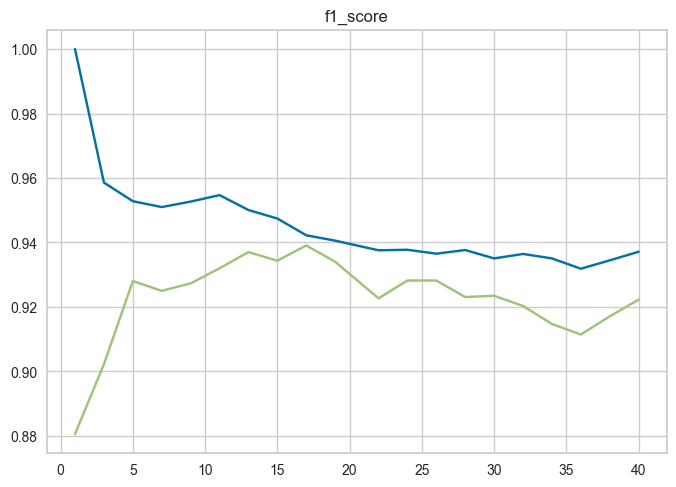

In [40]:
draw_criterions(
    KNeighborsClassifier, 'n_neighbors', criterions,
    np.linspace(1, 40, 20).round().astype(int)
)

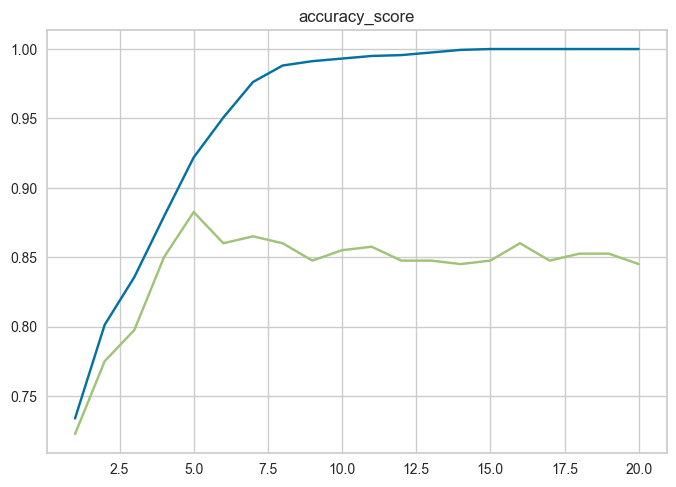

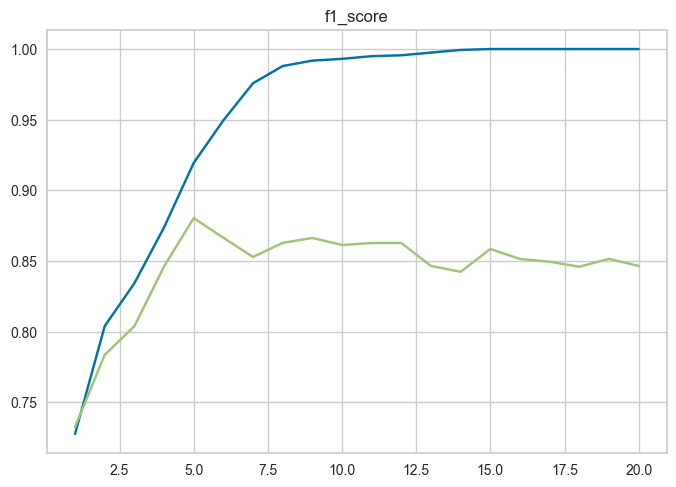

In [41]:
draw_criterions(
    DecisionTreeClassifier, 'max_depth', criterions,
    np.linspace(1, 20, 20).round().astype(int)
)

#### 3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

In [548]:
dataset = np.genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X, y = dataset[:, :-1], dataset[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape, y.shape

((506, 104), (506,))

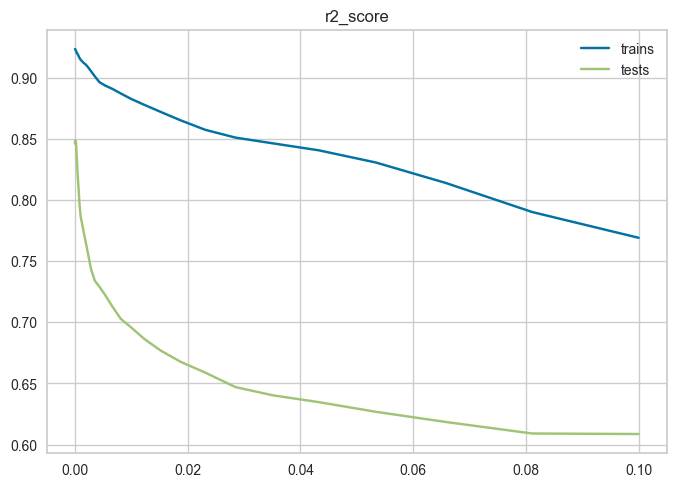

In [261]:
trains, tests = [], []
vrange = np.logspace(-10, -1, 100)
for i in vrange:
    model = Lasso(alpha=i).fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    trains.append(r2_score(y_train, y_pred_train))
    tests.append(r2_score(y_test, y_pred_test))

plt.plot(vrange, trains, label='trains')
plt.plot(vrange, tests, label='tests')
plt.title(r2_score.__name__)
plt.legend()
plt.show()

In [262]:
ag_sort = np.argsort(tests)[::-1]
print('\n'.join(vrange[ag_sort][:5].astype(str)))

0.0001
8.111308307896872e-05
0.0001232846739442066
6.579332246575683e-05
5.3366992312063123e-05


In [267]:
opt = vrange[ag_sort][0]
opt

0.0001

##### Качественная Модель

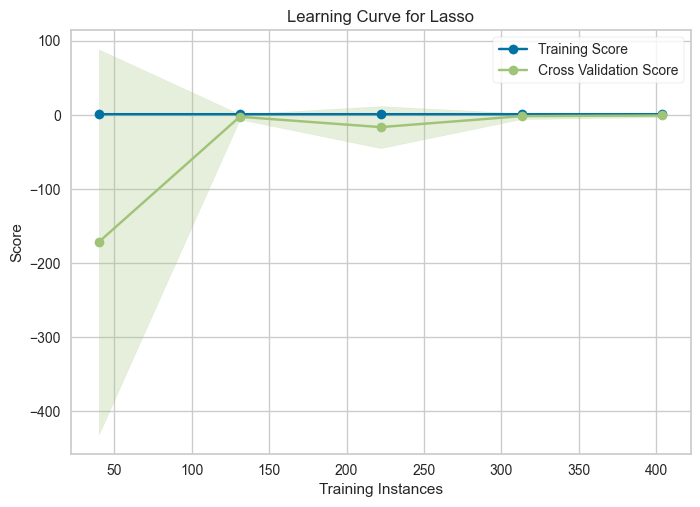

In [274]:
visualizer = LearningCurve(
    Lasso(alpha=opt),
    scoring='r2',
).fit(X, y).show()

##### Переобученная Модель

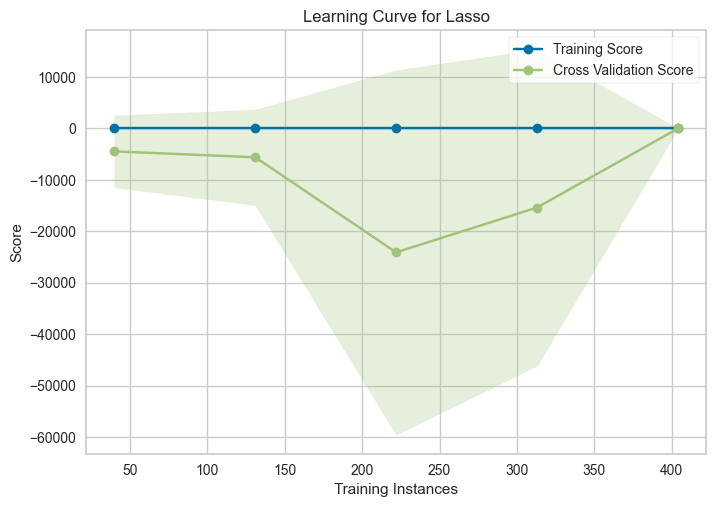

In [273]:
visualizer = LearningCurve(
    Lasso(alpha=0),
    scoring='r2',
).fit(X, y).show()

##### Недообученная Модель

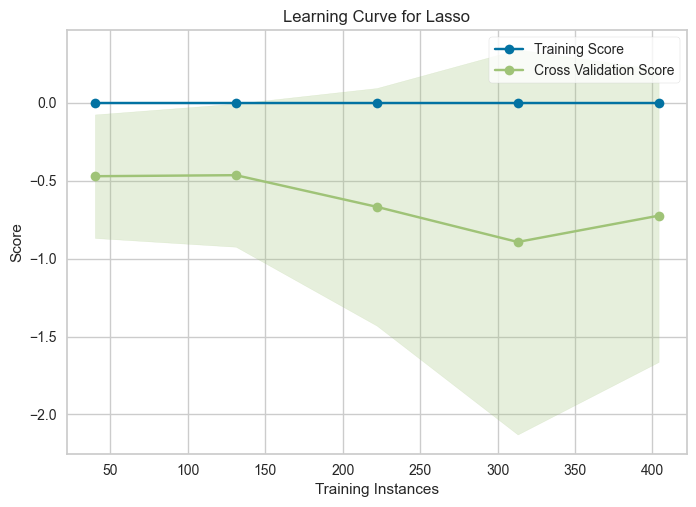

In [272]:
visualizer = LearningCurve(
    Lasso(alpha=1e+10),
    scoring='r2',
).fit(X, y).show()

#### 4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

In [627]:
enet = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)
y_pred_test = enet.predict(X_test)
y_pred_train = enet.predict(X_train)
print(f'Training r2 score: {enet.score(X_train, y_train):.4f}')
print(f'Test r2 score: {enet.score(X_test, y_test):.4f}')
print(f'Train MAE: {mean_absolute_error(y_train, y_pred_train):.4f}')
print(f'Test MAE: {mean_absolute_error(y_test, y_pred_test):.4f}')

Training r2 score: 0.2814
Test r2 score: 0.2638
Train MAE: 5.3765
Test MAE: 5.5055


In [612]:
trains, tests = [], []
alpha_range_calc, l1_ratio_range_calc = [], []
alpha_range = np.linspace(0, 6, 24)
l1_ratio_range = np.linspace(0, 1, 10)

for i in alpha_range:
    for j in l1_ratio_range:
        enet = ElasticNet(alpha=i, l1_ratio=j).fit(X_train, y_train)
        y_pred_train = enet.predict(X_train)
        y_pred_test = enet.predict(X_test)
        trains.append(mean_absolute_error(y_train, y_pred_train))
        tests.append(mean_absolute_error(y_test, y_pred_test))
        alpha_range_calc.append(i)
        l1_ratio_range_calc.append(j)

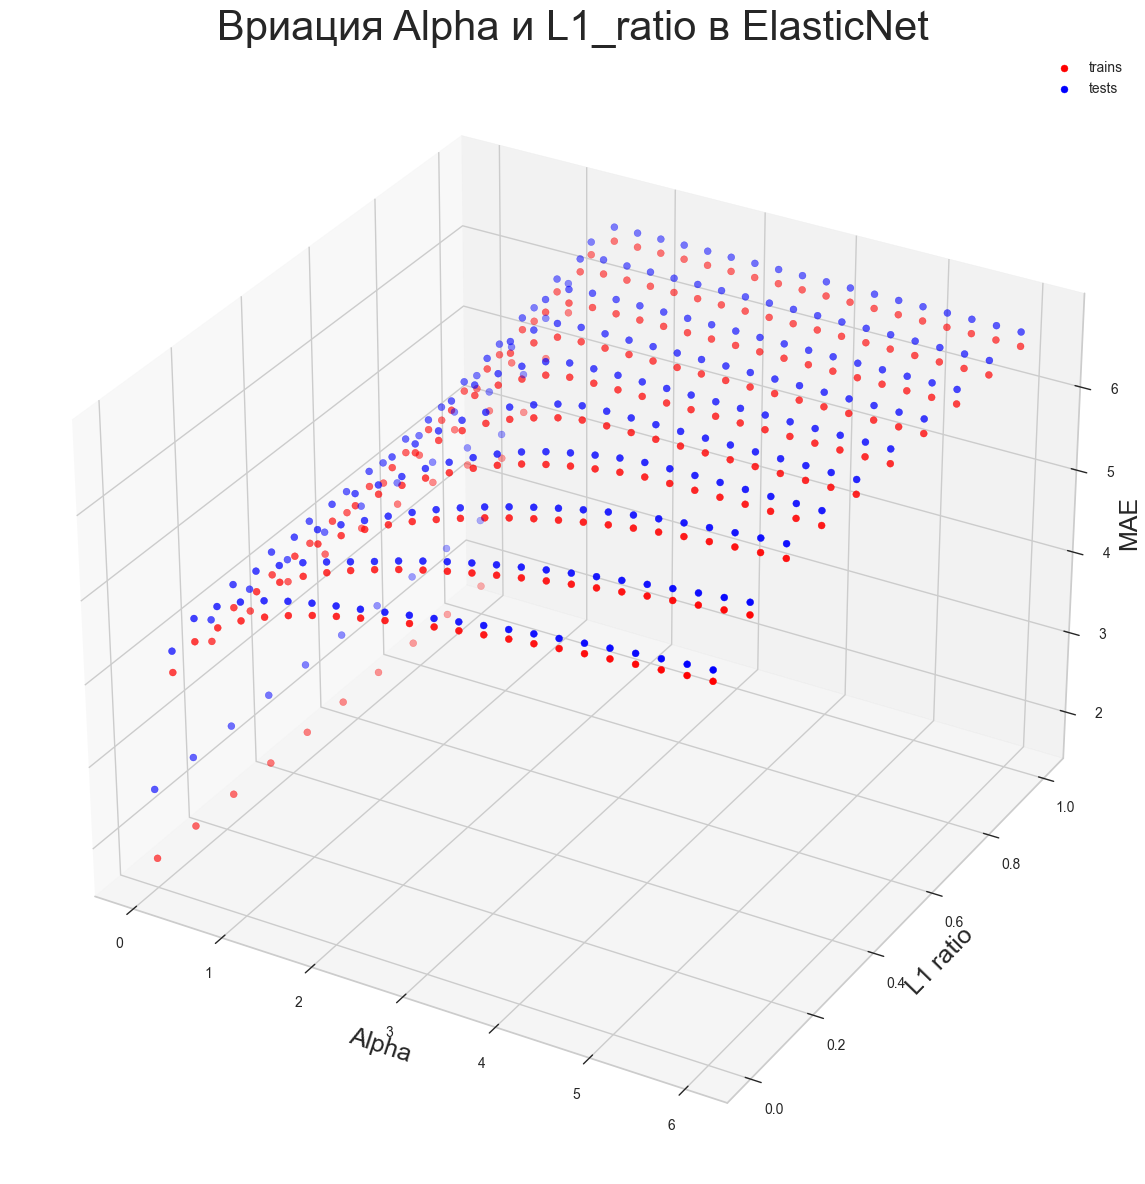

In [613]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    alpha_range_calc, l1_ratio_range_calc, trains,
    s=[25]*len(trains), c='red', label='trains'
)
ax.scatter(
    alpha_range_calc, l1_ratio_range_calc, tests,
    s=[25]*len(tests), c='blue', label='tests'
)

plt.title('Вриация Alpha и L1_ratio в ElasticNet', size=30)
ax.set_xlabel('Alpha', size=18)
ax.set_ylabel('L1 ratio', size=18)
ax.set_zlabel('MAE', size=18, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()

In [614]:
alpha_range_calc = np.array(alpha_range_calc)
l1_ratio_range_calc = np.array(l1_ratio_range_calc)

In [615]:
ag_sort = np.argsort(tests)
print('Alpha:\n' + '\n'.join(alpha_range_calc[ag_sort][:5].astype(str)), end='\n'*2)
print('L1 ratio:\n' + '\n'.join(l1_ratio_range_calc[ag_sort][:5].astype(str)))

Alpha:
0.0
0.0
0.0
0.0
0.0

L1 ratio:
0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444


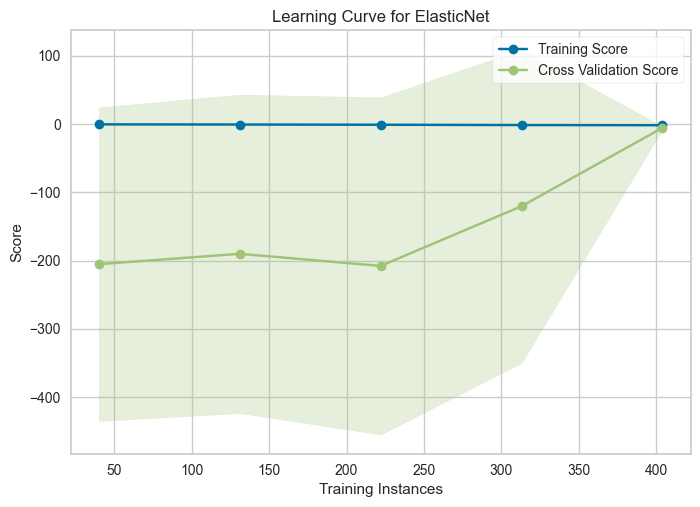

In [619]:
visualizer = LearningCurve(
    ElasticNet(
        alpha=alpha_range_calc[ag_sort][1],
        l1_ratio=l1_ratio_range_calc[ag_sort][1],
    ), scoring='neg_mean_absolute_error'
).fit(X, y).show()

In [625]:
enet = ElasticNet(alpha=alpha_range_calc[ag_sort][0], l1_ratio=l1_ratio_range_calc[ag_sort][0]).fit(X_train, y_train)
y_pred_test = enet.predict(X_test)
y_pred_train = enet.predict(X_train)
print(f'Training r2 score: {enet.score(X_train, y_train):.4f}')
print(f'Test r2 score: {enet.score(X_test, y_test):.4f}')
print(f'Train MAE: {mean_absolute_error(y_train, y_pred_train):.4f}')
print(f'Test MAE: {mean_absolute_error(y_test, y_pred_test):.4f}')

Training r2 score: 0.9304
Test r2 score: 0.8347
Train MAE: 1.7725
Test MAE: 2.6249


#### 5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

In [663]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = 'Outcome'
X, y = df.drop(target, axis=1), df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [669]:
param_range = np.arange(1, 25)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name='max_depth',
    param_range=param_range, cv=5, scoring='f1',
)
test_mean = np.mean(test_scores, axis=1)
opt = param_range[np.argmax(test_mean)]
print(f'{opt = }')

opt = 4


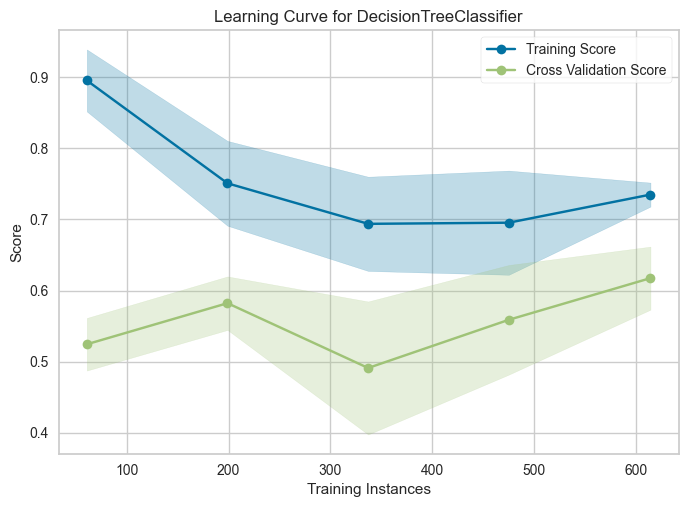

In [670]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=opt),
    scoring='f1', cv=5
).fit(X, y).show()

In [671]:
model = DecisionTreeClassifier(max_depth=opt).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print(f'Train f1_score: {f1_score(y_train, y_train_pred):.4f}')
print(f'Test f1_score: {f1_score(y_test, y_pred):.4f}')

Train f1_score: 0.7126
Test f1_score: 0.5905


#### 6. Повторите анализ на других реальных датасетах из репозитория OpenML (banknote-authentication)

In [5]:
data = fetch_openml('banknote-authentication')
df = pd.concat([data.data, data.target], axis=1)
df

,V1,V2,V3,V4,Class
0,3.6216,8.6661,-2.8073,-0.4470,1
1,4.5459,8.1674,-2.4586,-1.4621,1
2,3.8660,-2.6383,1.9242,0.1065,1
3,3.4566,9.5228,-4.0112,-3.5944,1
4,0.3292,-4.4552,4.5718,-0.9888,1
...,...,...,...,...,...
1367,0.4061,1.3492,-1.4501,-0.5595,2
1368,-1.3887,-4.8773,6.4774,0.3418,2
1369,-3.7503,-13.4586,17.5932,-2.7771,2
1370,-3.5637,-8.3827,12.3930,-1.2823,2


In [6]:
print(data.DESCR)

Author: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe)  
Source: [UCI](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) - 2012  
Please cite: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html) 

Dataset about distinguishing genuine and forged banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images.

### Attribute Information  

V1. variance of Wavelet Transformed image (continuous)  
V2. skewness of Wavelet Transformed image (continuous)  
V3. curtosis of Wavelet Transformed image (continuous)  
V4. entropy of image (continuous)  

Class (target). Presumably 1 for genuine 

In [7]:
df.describe()

,V1,V2,V3,V4
count,1372.0000,1372.0000,1372.0000,1372.0000
mean,0.4337,1.9224,1.3976,-1.1917
std,2.8428,5.8690,4.3100,2.1010
min,-7.0421,-13.7731,-5.2861,-8.5482
25%,-1.7730,-1.7082,-1.5750,-2.4135
50%,0.4962,2.3197,0.6166,-0.5867
75%,2.8215,6.8146,3.1792,0.3948
max,6.8248,12.9516,17.9274,2.4495


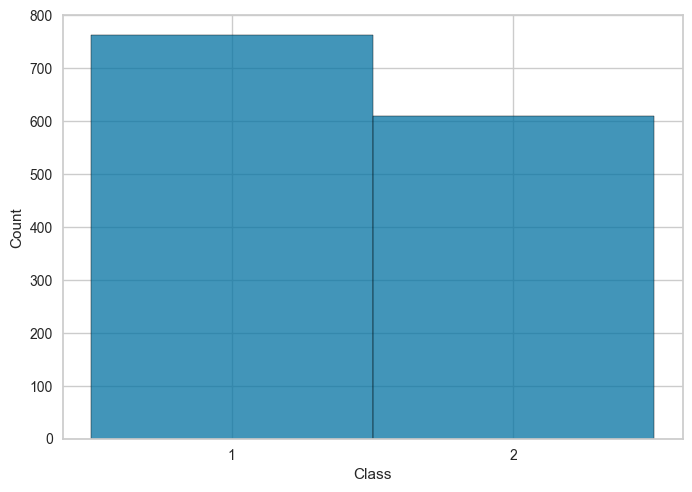

In [8]:
sns.histplot(df.Class)
plt.show()

In [9]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

In [10]:
le = LabelEncoder()
df.Class = le.fit_transform(df.Class)
df

,V1,V2,V3,V4,Class
0,3.6216,8.6661,-2.8073,-0.4470,0
1,4.5459,8.1674,-2.4586,-1.4621,0
2,3.8660,-2.6383,1.9242,0.1065,0
3,3.4566,9.5228,-4.0112,-3.5944,0
4,0.3292,-4.4552,4.5718,-0.9888,0
...,...,...,...,...,...
1367,0.4061,1.3492,-1.4501,-0.5595,1
1368,-1.3887,-4.8773,6.4774,0.3418,1
1369,-3.7503,-13.4586,17.5932,-2.7771,1
1370,-3.5637,-8.3827,12.3930,-1.2823,1


In [11]:
target = 'Class'
X, y = df.drop(target, axis=1), df[target]
X.shape, y.shape

((1372, 4), (1372,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### LogisticRegression

In [13]:
lr = LogisticRegression().fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
cv_score = cross_val_score(
    lr, X, y, cv=5, scoring='accuracy',
).mean()
print(f'{lr.__class__.__name__}, {accuracy = :.4f}, {cv_score = :.4f}')

LogisticRegression, accuracy = 0.9891, cv_score = 0.9898


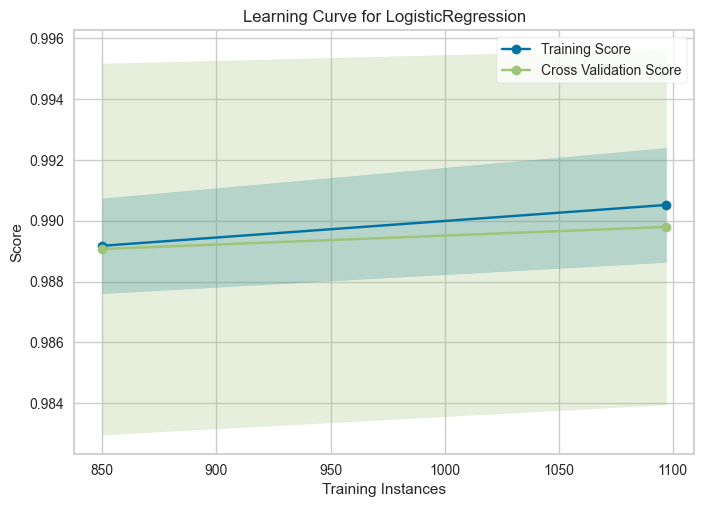

In [14]:
visualizer = LearningCurve(
    lr, scoring='accuracy', cv=5
).fit(X, y).show()

##### RidgeClassifier

In [15]:
ridge = RidgeClassifier(alpha=1).fit(X_train, y_train)
accuracy = ridge.score(X_test, y_test)
cv_score = cross_val_score(
    ridge, X, y, cv=5, scoring='accuracy',
).mean()
print(f'{ridge.__class__.__name__}, {accuracy = :.4f}, {cv_score = :.4f}')

RidgeClassifier, accuracy = 0.9709, cv_score = 0.9767


In [16]:
param_range = np.arange(0, 25, 0.1)
train_scores, test_scores = validation_curve(
    RidgeClassifier(), X, y, param_name='alpha',
    param_range=param_range, cv=5, scoring='accuracy',
)
test_mean = np.mean(test_scores, axis=1)
opt = param_range[np.argmax(test_mean)]
scores = test_scores[np.argmax(test_mean)].mean()
print(f'{opt = }, {scores = :.4f}')

opt = 0.0, scores = 0.9767


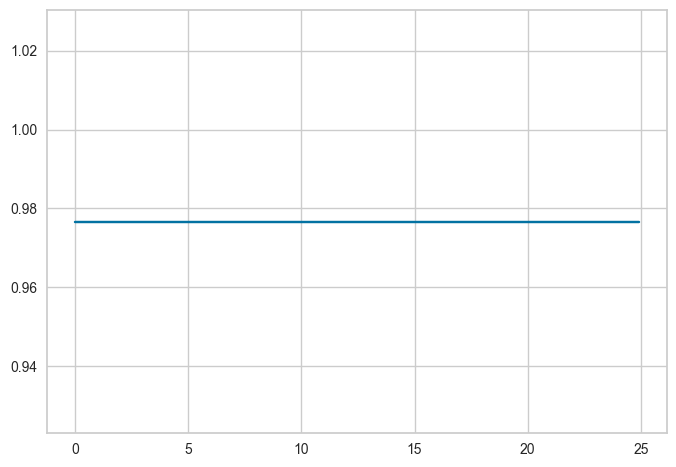

In [17]:
plt.plot(param_range, test_mean)
plt.show()

##### DecisionTreeClassifier

In [18]:
dtc = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
accuracy = dtc.score(X_test, y_test)
print(f'{dtc.__class__.__name__}, {accuracy = :.4f}')

DecisionTreeClassifier, accuracy = 0.9673


In [19]:
param_range = np.arange(1, 125)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name='max_depth',
    param_range=param_range, cv=5, scoring='accuracy',
)
test_mean = np.mean(test_scores, axis=1)
opt = param_range[np.argmax(test_mean)]
scores = test_scores[np.argmax(test_mean)].mean()
print(f'{opt = }, {scores = :.4f}')

opt = 35, scores = 0.9832


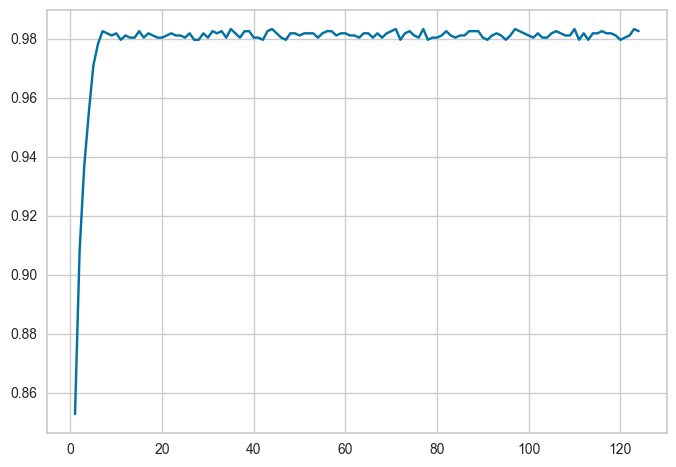

In [20]:
plt.plot(param_range, test_mean)
plt.show()

In [21]:
dtc = DecisionTreeClassifier(max_depth=opt).fit(X_train, y_train)
accuracy = dtc.score(X_test, y_test)
print(f'{dtc.__class__.__name__}, {accuracy = :.4f}')

DecisionTreeClassifier, accuracy = 0.9891


##### Исходя из результатов, LogisticRegression показала наибольшую эффективность на данных, соответственно регуляризация не требуется